# RainFall Prediction

# import Libraries


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data File

In [43]:
df=pd.read_excel('C:/Users/Manikata/OneDrive/Desktop/sydney_rain prediction.xlsx')

In [44]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


# Data Exploration

In [45]:
df.shape

(3337, 17)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   MinTemp       3337 non-null   float64       
 2   MaxTemp       3337 non-null   float64       
 3   Rainfall      3337 non-null   float64       
 4   Evaporation   3337 non-null   float64       
 5   Sunshine      3337 non-null   float64       
 6   Humidity9am   3337 non-null   float64       
 7   Humidity3pm   3337 non-null   float64       
 8   Pressure9am   3337 non-null   float64       
 9   Pressure3pm   3337 non-null   float64       
 10  Cloud9am      3337 non-null   float64       
 11  Cloud3pm      3337 non-null   float64       
 12  Temp9am       3337 non-null   float64       
 13  Temp3pm       3337 non-null   float64       
 14  RainToday     3337 non-null   float64       
 15  RainTomorrow  3337 non-null   int64   

In [49]:
import pandas as pd


# Define a dictionary mapping 'Yes' to 1 and 'No' to 
mapping = {'Yes': 1, 'No': 0}

# List of string columns you want to convert
str_columns = ['RainToday', 'RainTomorrow']

for col in str_columns:
    df[col] = df[col].map(mapping)

# Display the DataFrame after conversion
print(df.head())

        Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0 2008-02-01     19.5     22.4      15.6          6.2       0.0         92.0   
1 2008-02-02     19.5     25.6       6.0          3.4       2.7         83.0   
2 2008-02-03     21.6     24.5       6.6          2.4       0.1         88.0   
3 2008-02-04     20.2     22.8      18.8          2.2       0.0         83.0   
4 2008-02-05     19.7     25.7      77.4          NaN       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday  RainTomorrow  
0     20.9        1.0             1  
1   

In [46]:
df.drop(columns=["Location"], inplace=True)

In [47]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [48]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


## Handling Missing values

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   MinTemp       3334 non-null   float64       
 2   MaxTemp       3335 non-null   float64       
 3   Rainfall      3331 non-null   float64       
 4   Evaporation   3286 non-null   float64       
 5   Sunshine      3321 non-null   float64       
 6   Humidity9am   3323 non-null   float64       
 7   Humidity3pm   3324 non-null   float64       
 8   Pressure9am   3317 non-null   float64       
 9   Pressure3pm   3318 non-null   float64       
 10  Cloud9am      2771 non-null   float64       
 11  Cloud3pm      2776 non-null   float64       
 12  Temp9am       3333 non-null   float64       
 13  Temp3pm       3333 non-null   float64       
 14  RainToday     3331 non-null   float64       
 15  RainTomorrow  3337 non-null   int64   

In [51]:
columns_to_fill = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine","Cloud9am", 
                   "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", 
                   "Cloud3pm", "Temp9am", "Temp3pm"]

for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   MinTemp       3337 non-null   float64       
 2   MaxTemp       3337 non-null   float64       
 3   Rainfall      3337 non-null   float64       
 4   Evaporation   3337 non-null   float64       
 5   Sunshine      3337 non-null   float64       
 6   Humidity9am   3337 non-null   float64       
 7   Humidity3pm   3337 non-null   float64       
 8   Pressure9am   3337 non-null   float64       
 9   Pressure3pm   3337 non-null   float64       
 10  Cloud9am      3337 non-null   float64       
 11  Cloud3pm      3337 non-null   float64       
 12  Temp9am       3337 non-null   float64       
 13  Temp3pm       3337 non-null   float64       
 14  RainToday     3331 non-null   float64       
 15  RainTomorrow  3337 non-null   int64   

In [53]:
df["RainToday"].fillna(method="ffill",inplace=True)

In [54]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1


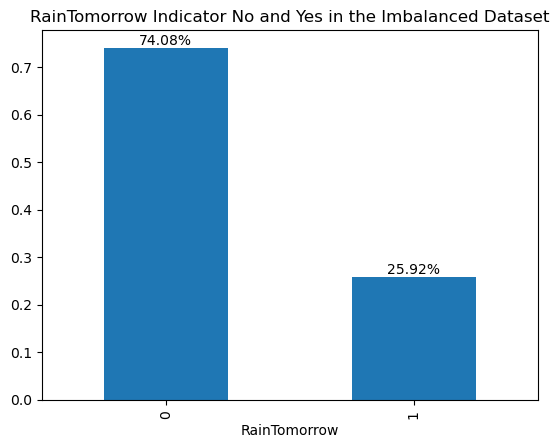

In [55]:
ax=df.RainTomorrow.value_counts(normalize = True).plot(kind="bar")
plt.title('RainTomorrow Indicator No and Yes in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',  (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

C:\Users\Manikata\AppData\Local\Temp\ipykernel_14032\584385825.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


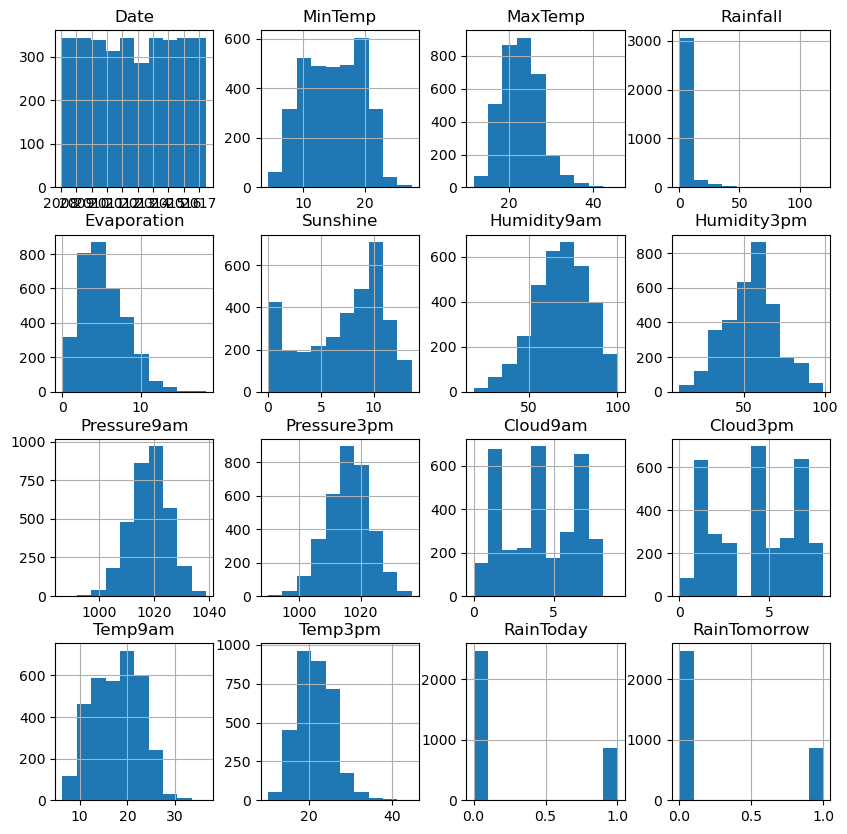

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is supposed to represent your DataFrame
# If 'data' is not defined, you might need to replace it with your actual DataFrame name, like 'df'
data = df

# Plot histograms for all columns in the DataFrame
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
data.hist(ax=ax)
plt.show()


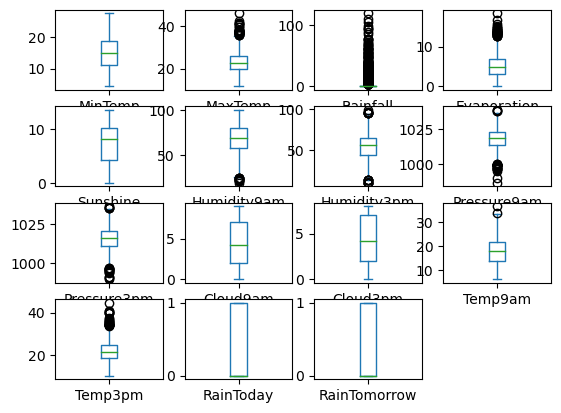

In [57]:
df.plot(kind="box",subplots=True,layout=(4,4))
plt.show()

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

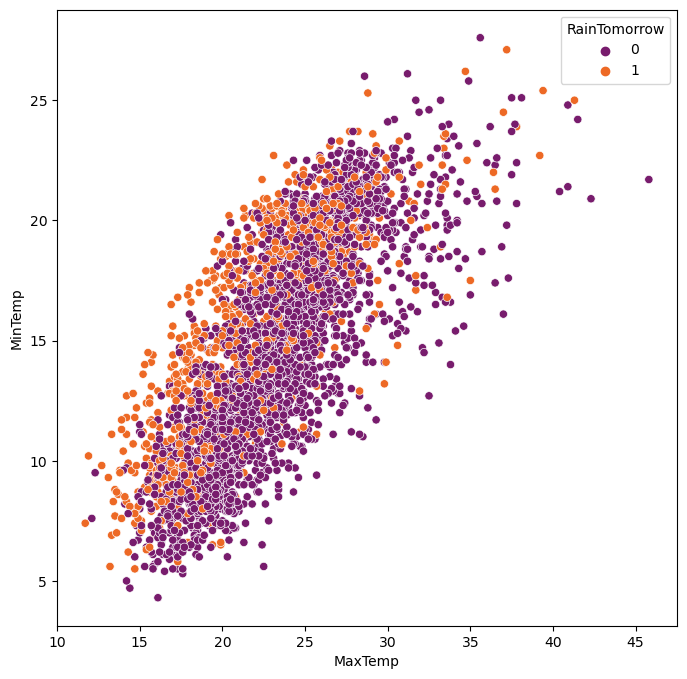

In [58]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="MaxTemp",y="MinTemp",hue="RainTomorrow",palette="inferno",data=df)


<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

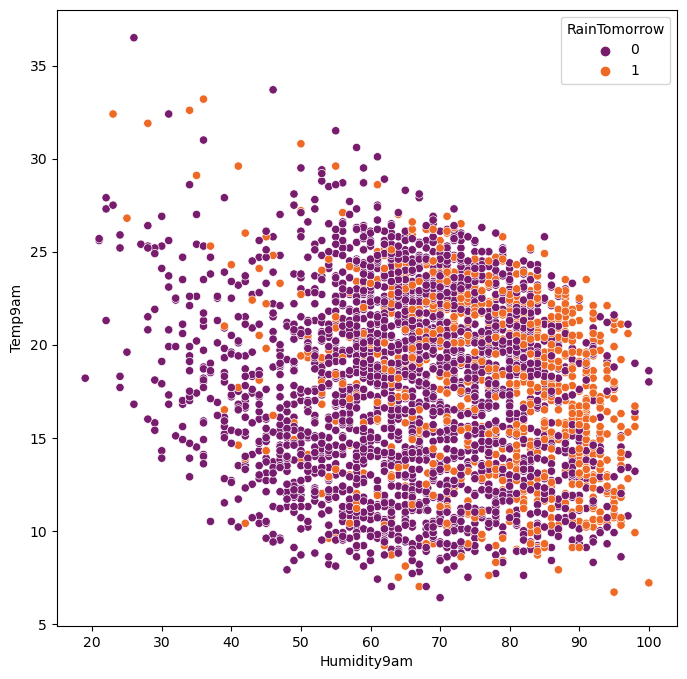

In [59]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Humidity9am",y="Temp9am",hue="RainTomorrow",palette="inferno",data=df) 

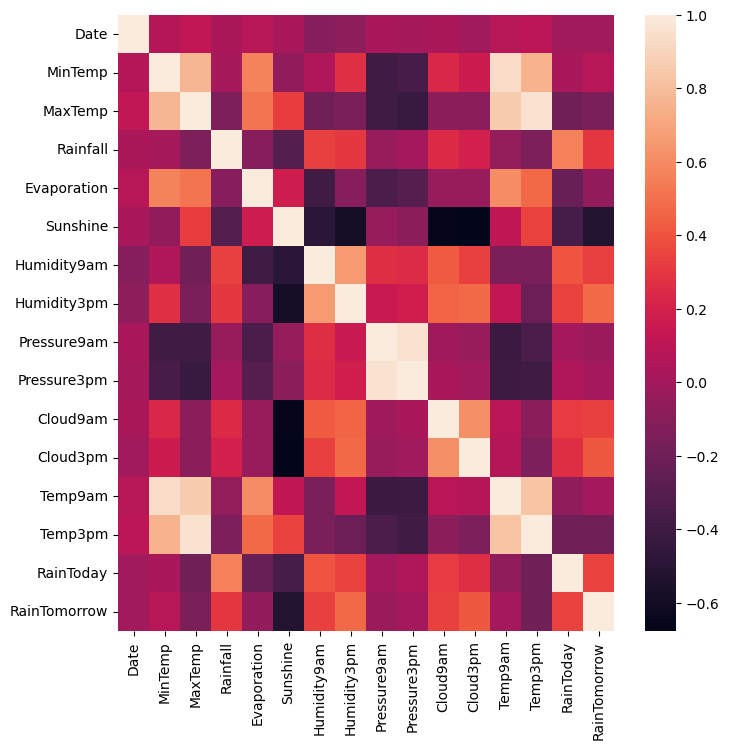

In [60]:
encoded_df = pd.get_dummies(df)

# Now you can compute correlations and create the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(encoded_df.corr())
plt.show()

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


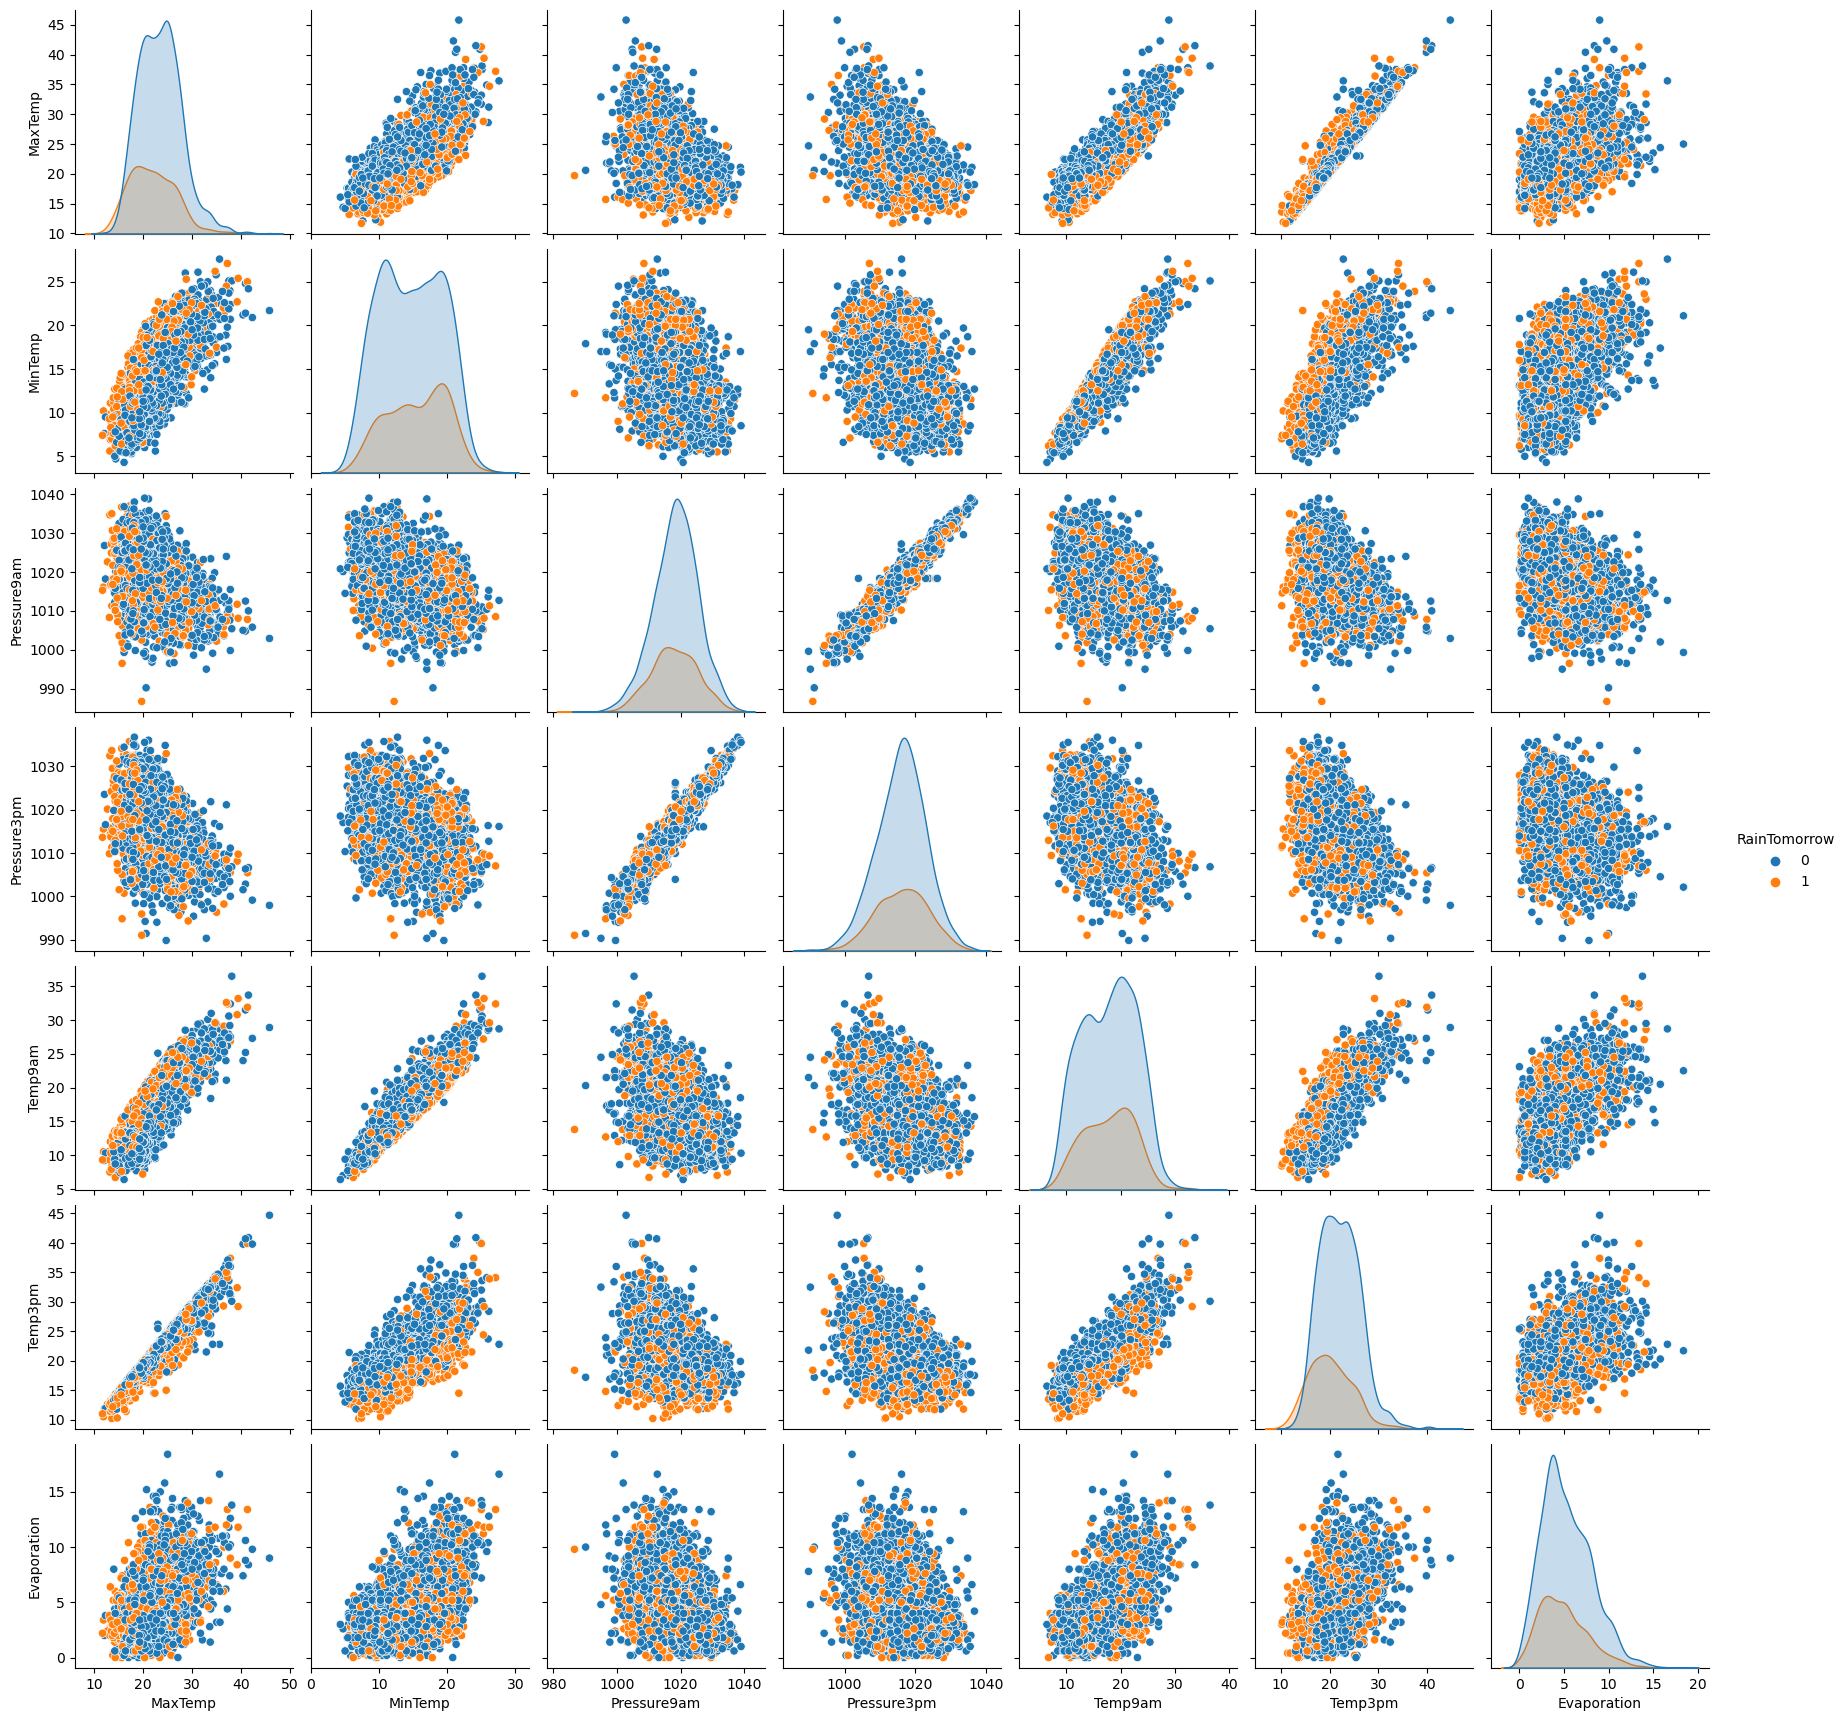

In [78]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

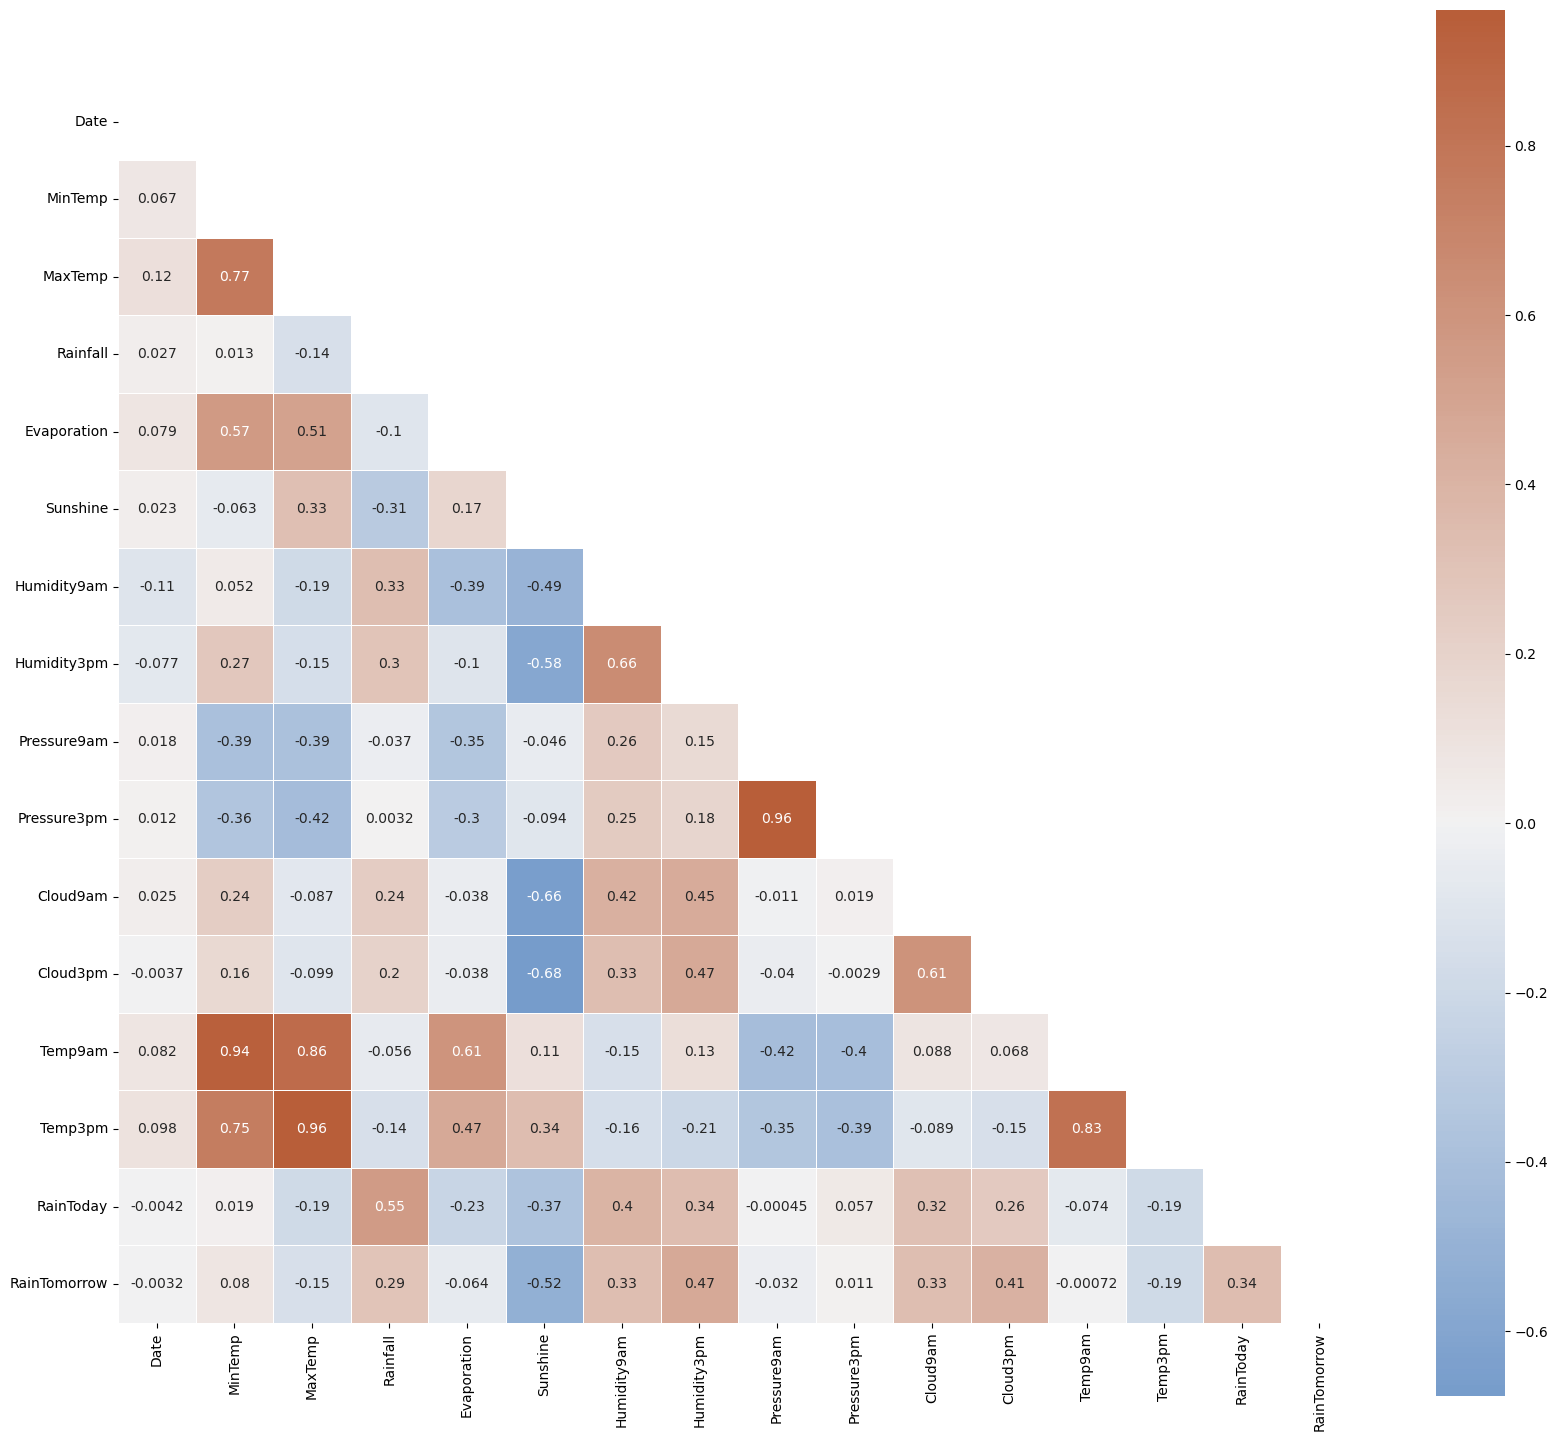

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Use bool instead of np.bool
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()


In [61]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1


In [62]:
from sklearn.model_selection import train_test_split
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
Y = df['RainTomorrow']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# LogisticRegression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
Y = df['RainTomorrow']
# Split the data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Initialize and train the Logistic Regression model
lr = LogisticRegression(max_iter=3000)  # Increase max_iter to ensure convergence
lr.fit(x_train, y_train)

# Predictions
prediction = lr.predict(x_test)

# Evaluate performance
print("Logistic Regression Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
print("Classification Report:\n", classification_report(y_test, prediction))
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print("ROC AUC Score:", roc_auc_score(y_test, prediction))


Logistic Regression Model Performance:
Confusion Matrix:
 [[456  27]
 [ 83 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       483
           1       0.79      0.55      0.65       185

    accuracy                           0.84       668
   macro avg       0.82      0.75      0.77       668
weighted avg       0.83      0.84      0.83       668

Accuracy: 0.8353293413173652
Precision: 0.7906976744186046
Recall: 0.5513513513513514
ROC AUC Score: 0.7477253651166695


# DecisionTreeClassifier

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(x_train, y_train)

# Predictions
predictions = dt.predict(x_test)

# Evaluate performance
print("Decision Tree Classifier Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("ROC AUC Score:", roc_auc_score(y_test, predictions))


Decision Tree Classifier Model Performance:
Confusion Matrix:
 [[398  85]
 [ 78 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       483
           1       0.56      0.58      0.57       185

    accuracy                           0.76       668
   macro avg       0.70      0.70      0.70       668
weighted avg       0.76      0.76      0.76       668

Accuracy: 0.7559880239520959
Precision: 0.5572916666666666
Recall: 0.5783783783783784
ROC AUC Score: 0.7011974707626881


# RandomForestClassifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(x_train, y_train)

# Predictions
prediction = rf.predict(x_test)

# Evaluate performance
print("RandomForestClassifier Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
print("Classification Report:\n", classification_report(y_test, prediction))
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print("ROC AUC Score:", roc_auc_score(y_test, prediction))


RandomForestClassifier Model Performance:
Confusion Matrix:
 [[487  22]
 [ 76  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       509
           1       0.79      0.52      0.63       159

    accuracy                           0.85       668
   macro avg       0.83      0.74      0.77       668
weighted avg       0.85      0.85      0.84       668

Accuracy: 0.8532934131736527
Precision: 0.7904761904761904
Recall: 0.5220125786163522
ROC AUC Score: 0.7393952873435395


# xgboost

In [114]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Predictions
pred = xgb_model.predict(x_test)

# Evaluate performance
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))  # Add precision score
print("Recall:", recall_score(y_test, pred))  # Add recall score
print("ROC AUC Score:", roc_auc_score(y_test, pred))  # Add ROC AUC score
print("Classification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))


XGBoost Model Performance:
Accuracy: 0.8233532934131736
Precision: 0.7481481481481481
Recall: 0.5459459459459459
ROC AUC Score: 0.7377762856023725
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       483
           1       0.75      0.55      0.63       185

    accuracy                           0.82       668
   macro avg       0.80      0.74      0.76       668
weighted avg       0.82      0.82      0.81       668

Confusion Matrix:
 [[449  34]
 [ 84 101]]


# KNeighborsClassifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score

# Assuming x_train, x_test, y_train, y_test are your training and testing data

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predictions
prediction = knn.predict(x_test)

# Evaluate performance
print("KNN Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
print("Classification Report:\n", classification_report(y_test, prediction))
print("Accuracy:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print("ROC AUC Score:", roc_auc_score(y_test, prediction))


KNN Model Performance:
Confusion Matrix:
 [[447  36]
 [ 92  93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87       483
           1       0.72      0.50      0.59       185

    accuracy                           0.81       668
   macro avg       0.78      0.71      0.73       668
weighted avg       0.80      0.81      0.80       668

Accuracy: 0.8083832335329342
Precision: 0.7209302325581395
Recall: 0.5027027027027027
ROC AUC Score: 0.7140842706060097


# r2_score

In [120]:
from sklearn.metrics import r2_score

# Assuming y_test and prediction are your true and predicted target values, respectively
r_squared = r2_score(y_test, prediction)
print("R-squared:", r_squared)

R-squared: 0.04309775614123468


# #The best model is RandomForestClassifier

### Steps to improve the selected model's performance:

To improve the selected model

Feature engineering: Creating new features or transforming existing features to better represent the underlying patterns in the data.

Hyperparameter tuning: Fine-tuning the hyperparameters of the selected model using techniques like grid search or random search to find the optimal combination of hyperparameters.

Model ensembling: Combining multiple models (of different types or trained on different subsets of data) to further improve predictive performance.

Handling imbalanced data: If the dataset is imbalanced (i.e., one class is significantly more prevalent than others), applying techniques like oversampling, undersampling, or using class weights during model training can help improve performance.

Incorporating external data: Including additional relevant data sources such as satellite imagery or atmospheric data to enhance the model's predictive power.

In [117]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Assuming x_train, x_test, y_train, y_test are your training and testing data
# Assuming rf is your RandomForestClassifier model

# 1. Cross-validation
scores = cross_val_score(rf, x_train, y_train, cv=5)
print("Cross-validation scores:", scores)

# 2. Hyperparameter Tuning
# Example of tuning 'n_estimators'
# You can extend this to tune other hyperparameters as well
best_score = 0
best_n_estimators = None
for n_estimators in range(10, 101, 10):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    if score > best_score:
        best_score = score
        best_n_estimators = n_estimators
print("Best n_estimators:", best_n_estimators)

# 3. Feature Selection
rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
sfm = SelectFromModel(rf)
x_train_selected = sfm.fit_transform(x_train, y_train)
x_test_selected = sfm.transform(x_test)  # Corrected variable name to lowercase

# 4. Train the model with selected features
rf.fit(x_train_selected, y_train)  # Corrected variable name to lowercase

# 5. Evaluate the model
y_pred = rf.predict(x_test_selected)  # Corrected variable name to lowercase
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Cross-validation scores: [0.82022472 0.84456929 0.83333333 0.8576779  0.82739212]
Best n_estimators: 20
Accuracy: 0.812874251497006


# overfitting the data
#### To check for overfitting in a RandomForestClassifier model, you can compare the accuracy of the model on the training set with its accuracy on the testing set

#### calculate the accuracy of the model on both the training and testing sets using the accuracy_score function from scikit-learn.
#### compare the accuracy scores to check for overfitting. If the accuracy on the training set is significantly higher than the accuracy on the testing set, it may indicate overfitting.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
train_predictions = rf.predict(x_train)
test_predictions = rf.predict(x_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracy scores
print("Accuracy on training set:", train_accuracy)
print("Accuracy on testing set:", test_accuracy)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting the training data.")
else:
    print("The model is not overfitting the data.")


Accuracy on training set: 1.0
Accuracy on testing set: 0.8323353293413174
The model may be overfitting the training data.


## simplify the model

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier with reduced max_depth
rf_simplified = RandomForestClassifier(max_depth=5)  # Adjust max_depth as needed
rf_simplified.fit(x_train, y_train)

# Evaluate the simplified model
train_predictions_simplified = rf_simplified.predict(x_train)
test_predictions_simplified = rf_simplified.predict(x_test)
train_accuracy_simplified = accuracy_score(y_train, train_predictions_simplified)
test_accuracy_simplified = accuracy_score(y_test, test_predictions_simplified)

# Print the accuracy scores
print("Accuracy on training set (simplified model):", train_accuracy_simplified)
print("Accuracy on testing set (simplified model):", test_accuracy_simplified)

# Check for overfitting with the simplified model
if train_accuracy_simplified > test_accuracy_simplified:
    print("The simplified model may be overfitting the training data.")
else:
    print("The simplified model is not overfitting the data.")


Accuracy on training set (simplified model): 0.8523791682278007
Accuracy on testing set (simplified model): 0.8338323353293413
The simplified model may be overfitting the training data.


## ensemble method

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier with reduced max_depth
rf_ensemble = RandomForestClassifier(n_estimators=100, max_depth=5)  # Adjust parameters as needed
rf_ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
train_predictions_ensemble = rf_ensemble.predict(x_train)
test_predictions_ensemble = rf_ensemble.predict(x_test)
train_accuracy_ensemble = accuracy_score(y_train, train_predictions_ensemble)
test_accuracy_ensemble = accuracy_score(y_test, test_predictions_ensemble)

# Print the accuracy scores
print("Accuracy on training set (ensemble model):", train_accuracy_ensemble)
print("Accuracy on testing set (ensemble model):", test_accuracy_ensemble)

# Check for overfitting with the ensemble model
if train_accuracy_ensemble > test_accuracy_ensemble:
    print("The ensemble model may be overfitting the training data.")
else:
    print("The ensemble model is not overfitting the data.")


Accuracy on training set (ensemble model): 0.8542525290370926
Accuracy on testing set (ensemble model): 0.8383233532934131
The ensemble model may be overfitting the training data.


# Model Comparison

C:\Users\Manikata\AppData\Local\Temp\ipykernel_14032\1300440510.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_col.set_xticklabels(models, rotation=45, ha='right')


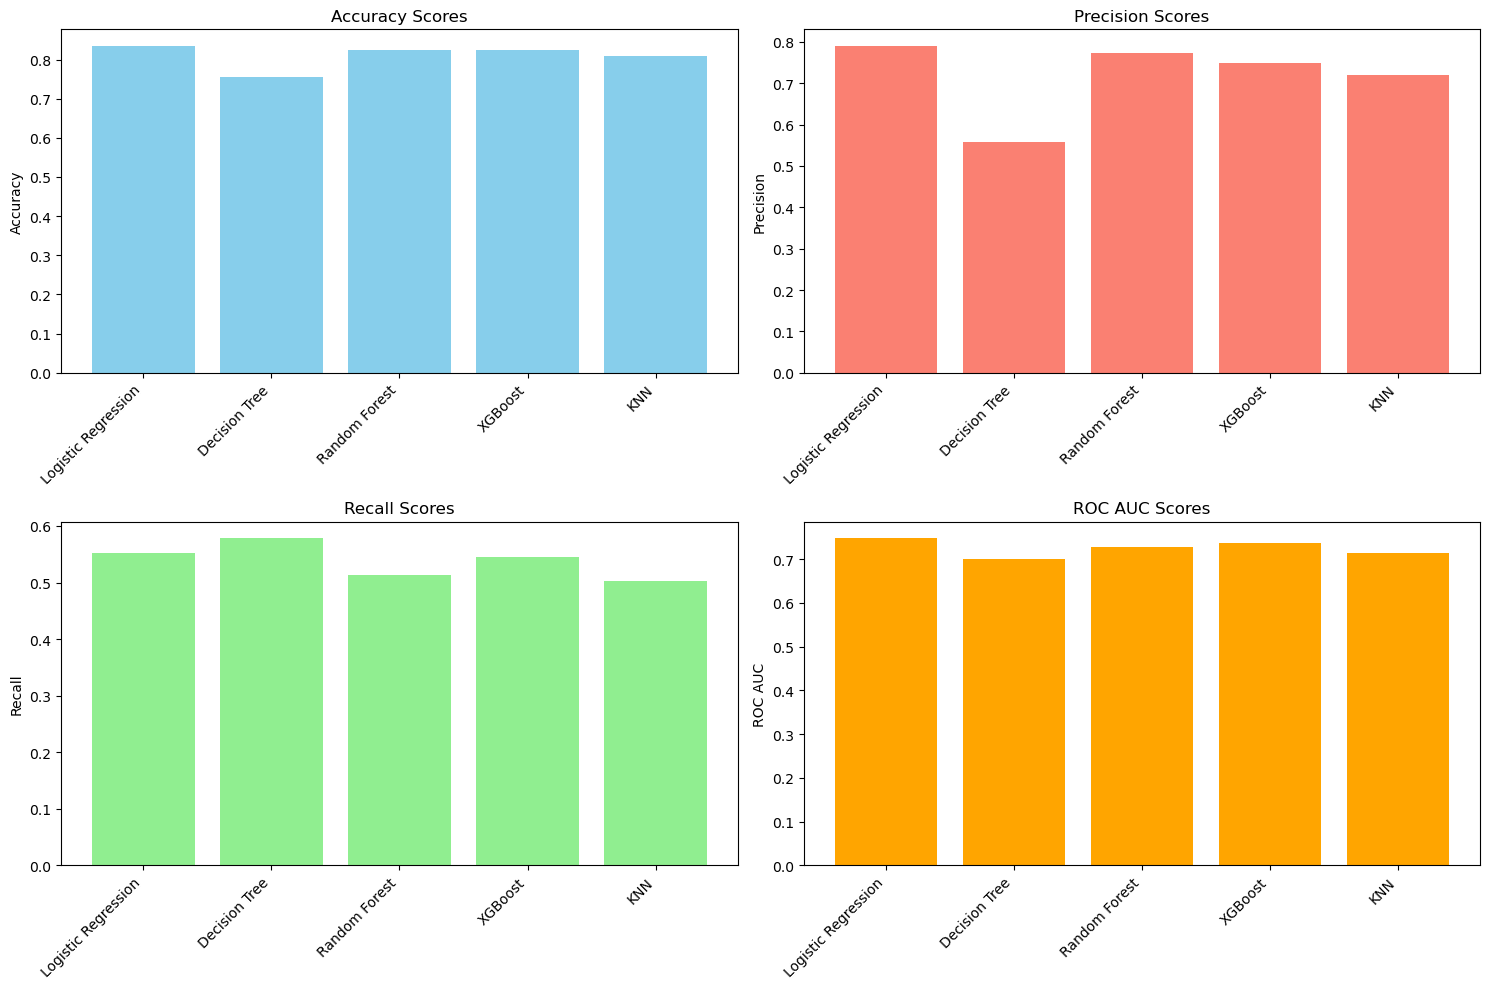

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions
prediction_rf = rf.predict(x_test)

# Then, calculate the evaluation metrics
accuracy_scores = [accuracy_score(y_test, prediction_lr), accuracy_score(y_test, prediction_dt),
                   accuracy_score(y_test, prediction_rf), accuracy_score(y_test, xgb_model.predict(x_test)),
                   accuracy_score(y_test, knn.predict(x_test))]

precision_scores = [precision_score(y_test, prediction_lr), precision_score(y_test, prediction_dt),
                    precision_score(y_test, prediction_rf), precision_score(y_test, xgb_model.predict(x_test)),
                    precision_score(y_test, knn.predict(x_test))]

recall_scores = [recall_score(y_test, prediction_lr), recall_score(y_test, prediction_dt),
                 recall_score(y_test, prediction_rf), recall_score(y_test, xgb_model.predict(x_test)),
                 recall_score(y_test, knn.predict(x_test))]

roc_auc_scores = [roc_auc_score(y_test, prediction_lr), roc_auc_score(y_test, prediction_dt),
                  roc_auc_score(y_test, prediction_rf), roc_auc_score(y_test, xgb_model.predict(x_test)),
                  roc_auc_score(y_test, knn.predict(x_test))]

# Plotting the metrics
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy scores
ax[0, 0].bar(models, accuracy_scores, color='skyblue')
ax[0, 0].set_title('Accuracy Scores')
ax[0, 0].set_ylabel('Accuracy')

# Precision scores
ax[0, 1].bar(models, precision_scores, color='salmon')
ax[0, 1].set_title('Precision Scores')
ax[0, 1].set_ylabel('Precision')

# Recall scores
ax[1, 0].bar(models, recall_scores, color='lightgreen')
ax[1, 0].set_title('Recall Scores')
ax[1, 0].set_ylabel('Recall')

# ROC AUC scores
ax[1, 1].bar(models, roc_auc_scores, color='orange')
ax[1, 1].set_title('ROC AUC Scores')
ax[1, 1].set_ylabel('ROC AUC')

# Rotate x-axis labels
for ax_row in ax:
    for ax_col in ax_row:
        ax_col.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Conclusion

### This project demonstrated the effectiveness of machine learning in weather prediction tasks and provided insights into the process of model development and evaluation. By continuing to refine and optimize the model, it is possible to further enhance its accuracy and reliability, thereby contributing to improved weather forecasting capabilities for the benefit of the community.